<a href="https://colab.research.google.com/github/ZaimaSartajTaheri/Blood_Donate/blob/master/Best_Taheri_Thesis_5_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.utils import shuffle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle competitions download multimodal-sentiment-analysis-cuet-nlp

In [ ]:
# !unzip multimodal-sentiment-analysis-cuet-nlp

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/TaheriThesis/Dataset/train.csv")
dataset

,image_name,Captions,Label_Sentiment,Label
0,69726087_2287869761319104_2019941278430527488_...,মাঝরাইতে মাঞ্জা মেরে সাজুগুজু করতে মন চাইতেছে।...,happy,0
1,67075210_2461249007528800_1687503280642457600_...,প্রচুর দেরি করে ফেলছি রে ভাইইইইইইইইই\nআজাইরা ন...,happy,0
2,66277813_359104348108873_2083668203577278464_n...,শুভ জন্মদিন ❤\nলেজেন্ড,happy,0
3,66140341_359531411399500_7237400573891313664_n...,একা একা খেলে বিশ্বের সেরা হওয়া যায় কিন্তু বিশ্...,sad,4
4,65021504_2484453855120831_2597787303715799040_...,একটা পাবলিক ভার্সিটিতে এসে লাইভ রিপোর্টিং করতে...,angry,1
...,...,...,...,...
3625,7000048.jpeg,আমি অত্যন্ত আতঙ্কিত. যদি সবকিছু ধ্বংস করে দেয়?,fear,3
3626,7000049.jpeg,আমি অত্যন্ত আতঙ্কিত. এটা বাস্তব হয়ে গেলে কি হবে?,fear,3
3627,7000050.jpeg,আমি অত্যন্ত আতঙ্কিত. যদি কেউ আমাকে আক্রমণ করে?,fear,3
3628,7000051.jpeg,আমি আমার পথ খুঁজে পাচ্ছি না. যদি আমি এখানে চির...,fear,3


In [ ]:
dataset = shuffle(dataset, random_state = 10)
dataset

,image_name,Captions,Label_Sentiment,Label
101,317614457_3631142493877242_4333131209344021325...,"আমাদের শেষ উৎসবের সূচনা … … …,🫠",sad,4
1178,4492.jpg,"ডটিং ভাই, উদীয়মান ট্রেন্ডসেটর: প্রিন্স জর্জ দ...",happy,0
2661,3258.jpg,এমনকি বৃষ্টিপাতের মধ্য দিয়েও আজ প্রাণবন্ত কার...,surprise,5
3170,2761.jpg,কেন আপনি হতাশ বোধ করছেন? কুইজ নিন:,other,6
437,342007953_579707654225265_2380627006671341447_...,"কমলদহে\r\n\r\nবি.দ্র : উক্ত খুমটি অনেক গভীর, স...",happy,0
...,...,...,...,...
3441,3716.jpg,আন্তর্জাতিক কম্পিউটার ভিশন সামার স্কুল আইসিভিএ...,other,6
1344,1241.jpg,সব কিছুর মুখোমুখি এবং উত্থান।,angry,1
527,149.jpg,আমি টাম্বলারকে ভালবাসি,happy,0
3197,2862.jpg,"চেয়ার, দেয়াল এবং সিলিংগুলি ঢাকা থাকে, আমাদের...",other,6


In [ ]:
# testset = pd.read_csv("test.csv")
# testset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 101 to 1289
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_name       3630 non-null   object
 1   Captions         3630 non-null   object
 2   Label_Sentiment  3630 non-null   object
 3   Label            3630 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 141.8+ KB


In [ ]:
dataset.shape

(3630, 4)

In [ ]:
dataset.columns

Index(['image_name', 'Captions', 'Label_Sentiment', 'Label'], dtype='object')

In [ ]:
dataset = dataset[['image_name', 'Captions', 'Label']]
dataset.columns

Index(['image_name', 'Captions', 'Label'], dtype='object')

In [ ]:
# testset.columns

In [ ]:
# img_path = os.path.join("/content/Memes/Memes/Bangla Thug Life (1).jpg")
# img = plt.imread(img_path)
# print(img.shape)
# plt.imshow(img)
# plt.show()

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Image  and labels preprocessing 

In [ ]:
# Trainset
X_image_train = []
y_train =[]
base_path = "/content/drive/MyDrive/TaheriThesis/Dataset/Images/"
for frame, captions,labels in dataset.values:
  img_path = os.path.join(base_path, frame)
  img = load_img(img_path, target_size = (180, 180))
  X_image_train.append(img)
  y_train.append(labels)



In [ ]:
X_image_train = np.array([np.array(val) for val in X_image_train])
y_train       = np.array(y_train)

In [ ]:
# X_image_test = []
# base_path = "/content/drive/MyDrive/TaheriThesis/Dataset/Images/"
# for id, frame, captions in testset.values:
#   img_path = os.path.join(base_path, frame)
#   img = load_img(img_path, target_size = (180, 180))
#   X_image_test.append(img)
  


In [ ]:
# X_image_test = np.array([np.array(val) for val in X_image_test])

In [ ]:
# type(X_image_test)

In [ ]:
type(X_image_train)

numpy.ndarray

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
print(f"train set length {len(X_image_train)}")
# print(f"test set length {len(X_image_test)}")

train set length 3630


# Text Preprocessing

In [ ]:
number_of_classes = len(dataset['Label'].unique())
number_of_classes

7

In [ ]:
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  3630


In [ ]:
# cleaning function
def cleaning(row):
  text = re.sub('[^\u0980-\u09FF]',' ', row) ## removing punctions
  return text 

dataset['cleaned'] = dataset.Captions.apply(cleaning)  
# testset['cleaned'] = testset.Captions.apply(cleaning)

In [ ]:
max_words = 100000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(dataset['cleaned'])

In [ ]:
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

11389


In [ ]:
def print_func(i, j):
    print(i, j)

print("Words ===> Counts")
k = 0
for (i, j) in word_counts.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Documents")       
for (i, j) in word_docs.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Index")
for (i, j) in word_index.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("Total Number of Documents: ", document_count)

Words ===> Counts
আমাদের 163
শেষ 96
উৎসবের 1
সূচনা 2
ডটিং 3
ভাই 21
উদীয়মান 3
ট্রেন্ডসেটর 2
প্রিন্স 4
জর্জ 6

Words ===> Documents
সূচনা 2
শেষ 89
আমাদের 154
উৎসবের 1
উদীয়মান 3
প্রিন্স 4
ডটিং 3
ট্রেন্ডসেটর 2
জর্জ 6
দ্বিতীয় 19

Words ===> Index
আমি 1
এবং 2
একটি 3
আমার 4
জন্য 5
এই 6
না 7
করে 8
আপনি 9
এটি 10
Total Number of Documents:  3630


In [ ]:
Length_frequency = {}

for i in range(len(dataset)):
     index = len(dataset['cleaned'][i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1

Text(0.5, 1.0, 'Length-Frequency Distribution')

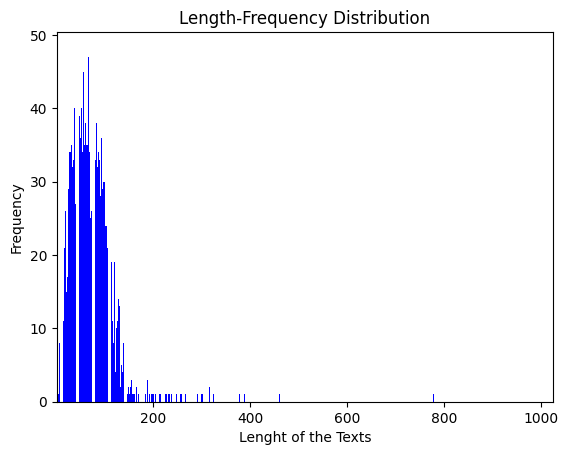

In [ ]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 1024)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

In [ ]:
sequences = tokenizer.texts_to_sequences(dataset['cleaned'])

In [ ]:
# test_sequences = tokenizer.texts_to_sequences(testset['cleaned'])

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 11389 unique tokens.


In [ ]:
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Text length",mx)
max_length = 60

##We can also determine maxlen by plotting the frequency distribution of the lengths
train_corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post',truncating = "post", maxlen= max_length)
## We get the maxlen value from the Length frequency distribution

print(train_corpus[0])

Maximum Text length 195
[  18   37 4183 2561    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


In [ ]:
# test_corpus = keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post',truncating = 'post', maxlen= max_length)

# Text train and test set

In [ ]:
X_text_train, y_train = train_corpus, dataset["Label"]
# X_text_test = test_corpus

In [ ]:
print("Training Size: ",X_text_train.shape)
# print("Test Size: ",X_text_test.shape)

Training Size:  (3630, 60)


# BiLSTM + CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D, Bidirectional, LSTM, GRU
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
keras.backend.clear_session()


embedding_dim = 64
number_of_classes = len(dataset['Label'].unique())
lc_text_inputs = Input(shape=(max_length,))
lc_embedding_layer = Embedding(max_words,embedding_dim)(lc_text_inputs)
#LSTM_Layer_1 = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
LSTM_Layer_2 = Bidirectional(LSTM(16,return_sequences=True))(lc_embedding_layer)
lc_conv1 = Conv1D(32,7,activation='relu')(LSTM_Layer_2)
lc_pool1 = MaxPooling1D(2)(lc_conv1)
# lc_conv2 = Conv1D(64,2,activation='relu')(lc_pool1)
# lc_pool2 = MaxPooling1D(2)(lc_conv2)
lc_flat = Flatten()(lc_pool1)
lc_dropout = layers.Dropout(0.4)(lc_flat)
outputs = Dense(7, activation='softmax')(lc_dropout)
cnn_lstm_model = Model(inputs=lc_text_inputs, outputs= outputs)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "onlytextmodel.h5",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
cnn_lstm_model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ["accuracy"]
)

In [ ]:
history = cnn_lstm_model.fit( X_text_train,
                    y_train, 
                    epochs=8, 
                    batch_size=32,
                    )

Epoch 1/8
114/114 [==============================] - 33s 149ms/step - loss: 1.8544 - accuracy: 0.2419
Epoch 2/8
114/114 [==============================] - 8s 73ms/step - loss: 1.6914 - accuracy: 0.3515
Epoch 3/8
114/114 [==============================] - 5s 48ms/step - loss: 0.9579 - accuracy: 0.6634
Epoch 4/8
114/114 [==============================] - 3s 29ms/step - loss: 0.4540 - accuracy: 0.8534
Epoch 5/8
114/114 [==============================] - 2s 16ms/step - loss: 0.2148 - accuracy: 0.9399
Epoch 6/8
114/114 [==============================] - 2s 18ms/step - loss: 0.1173 - accuracy: 0.9680
Epoch 7/8
114/114 [==============================] - 2s 20ms/step - loss: 0.0868 - accuracy: 0.9804
Epoch 8/8
114/114 [==============================] - 3s 29ms/step - loss: 0.0710 - accuracy: 0.9824


In [ ]:
#test_model =  keras.models.load_model("onlytextmodel.h5")
# y_pred  = cnn_lstm_model.predict([X_text_test])
# y_pred = tf.argmax(y_pred,axis = 1)
# y_pred

In [ ]:
# pred_value = np.array(y_pred)
# y_pred = pd.DataFrame(pred_value, columns=['Label'])
# id = pd.DataFrame(testset['Id'])
# submit_df = pd.concat([id, y_pred], axis=1).set_index('Id')
# submit_df.to_csv('onlytext.csv')

# Pretrain Image Model

In [ ]:
conv_base = tf.keras.applications.xception.Xception(
    weights = "imagenet",
    include_top = False,
    classifier_activation='softmax',
    input_shape = (180,180,3)

)

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ]
) 

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-6]:
  layer.trainable = False

In [ ]:
keras.backend.clear_session()
inputs = keras.Input(shape = (180,180, 3), name = "image_input")
x = data_augmentation(inputs)
x = keras.applications.xception.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten(name ="image_flatten")(x)
x = layers.Dense(256,activation = "relu", name ="image_dense1")(x)
x = layers.Dropout(0.4, name = "image_dropout")(x)
outputs = layers.Dense(7, activation = "softmax", name = "image_dense2")(x)
image_model = keras.Model(inputs, outputs)

In [ ]:
# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath = "onlyimagemodel.h5",
#         save_best_only = True,
#         monitor = "val_loss"
#     )
# ]

In [ ]:
image_model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0),
    metrics = ["accuracy"]
)

In [ ]:
history = image_model.fit( X_image_train,
                    y_train, 
                    epochs=15, 
                    batch_size=32,
                    # # validation_split =0.2,
                    # validation_split =0.05,
                    # callbacks = callbacks
                    )

Epoch 1/15
114/114 [==============================] - 20s 100ms/step - loss: 1.9132 - accuracy: 0.2322
Epoch 2/15
114/114 [==============================] - 11s 93ms/step - loss: 1.7938 - accuracy: 0.3041
Epoch 3/15
114/114 [==============================] - 11s 96ms/step - loss: 1.7139 - accuracy: 0.3358
Epoch 4/15
114/114 [==============================] - 11s 96ms/step - loss: 1.6546 - accuracy: 0.3678
Epoch 5/15
114/114 [==============================] - 11s 98ms/step - loss: 1.5516 - accuracy: 0.4174
Epoch 6/15
114/114 [==============================] - 11s 100ms/step - loss: 1.5003 - accuracy: 0.4490
Epoch 7/15
114/114 [==============================] - 12s 102ms/step - loss: 1.4128 - accuracy: 0.4807
Epoch 8/15
114/114 [==============================] - 12s 103ms/step - loss: 1.3388 - accuracy: 0.5113
Epoch 9/15
114/114 [==============================] - 11s 101ms/step - loss: 1.2739 - accuracy: 0.5380
Epoch 10/15
114/114 [==============================] - 11s 100ms/step - loss:

In [ ]:
# test_model =  keras.models.load_model("onlyimagemodel.h5")
# y_pred = test_model.predict([X_image_test])
# y_pred = tf.argmax(y_pred,axis = 1)
# y_pred

In [ ]:
# pred_value = np.array(y_pred)
# y_pred = pd.DataFrame(pred_value, columns=['Label'])
# id = pd.DataFrame(testset['Id'])
# submit_df = pd.concat([id, y_pred], axis=1).set_index('Id')
# submit_df.to_csv('onlyimage.csv')

# Merge Model

In [ ]:
keras.backend.clear_session()
concatenated = layers.concatenate([image_model.output, cnn_lstm_model.output])
#combined_dense1 = layers.Dense(128, activation = "relu", name = "combined_dense1")(concatenated)
combined_dropout = layers.Dropout(0.4, name = "combined_dropout")(concatenated)
outputs = layers.Dense(7, activation = "softmax", name = "output_dense_layer")(combined_dropout)
model = keras.Model([inputs, lc_text_inputs], outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input (InputLayer)       [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 180, 180, 3)  0           ['image_input[0][0]']            
                                                                                                  
 input_1 (InputLayer)           [(None, 60)]         0           []                               
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 180, 180, 3)  0           ['sequential[0][0]']         

In [ ]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics = ["accuracy"]
)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "mymodel.h5",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
history = model.fit([X_image_train, X_text_train],
                    y_train, 
                    epochs=15, 
                    batch_size=32,
                    # validation_split =0.2,
                    validation_split =0.1,
                    callbacks = callbacks
                    )

Epoch 1/15
103/103 [==============================] - 36s 248ms/step - loss: 1.8503 - accuracy: 0.1901 - val_loss: 1.7229 - val_accuracy: 0.5207
Epoch 2/15
103/103 [==============================] - 20s 192ms/step - loss: 1.6403 - accuracy: 0.4815 - val_loss: 1.5674 - val_accuracy: 0.5372
Epoch 3/15
103/103 [==============================] - 16s 160ms/step - loss: 1.4980 - accuracy: 0.5366 - val_loss: 1.4733 - val_accuracy: 0.6639
Epoch 4/15
103/103 [==============================] - 15s 146ms/step - loss: 1.3704 - accuracy: 0.5886 - val_loss: 1.3518 - val_accuracy: 0.6667
Epoch 5/15
103/103 [==============================] - 16s 153ms/step - loss: 1.3109 - accuracy: 0.5699 - val_loss: 1.3130 - val_accuracy: 0.6253
Epoch 6/15
103/103 [==============================] - 15s 145ms/step - loss: 1.2416 - accuracy: 0.5868 - val_loss: 1.2162 - val_accuracy: 0.6997
Epoch 7/15
103/103 [==============================] - 14s 138ms/step - loss: 1.2078 - accuracy: 0.5993 - val_loss: 1.1730 - val_ac

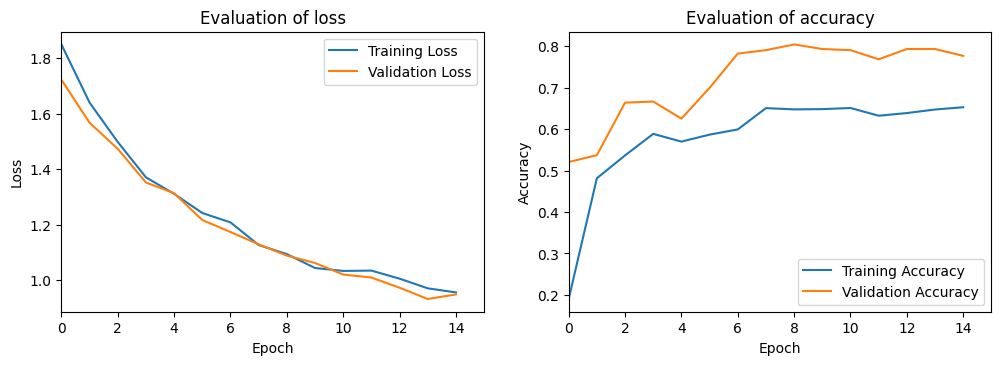

In [ ]:
# test_model =  keras.models.load_model("mymodel.h5")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss',scalex=True)
plt.plot(history.history['val_loss'], label='Validation Loss',scalex=True)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.xlim(0,15)
plt.legend()
plt.title('Evaluation of loss')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xlim(0,15)
plt.legend()
plt.title('Evaluation of accuracy')
plt.savefig("irnv2_curve3.png")


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,target_names=['happy','angry','disgust','fear','sad','surprise','other']))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
# y_pred = test_model.predict([X_image_test, X_text_test])
# y_pred = tf.argmax(y_pred,axis = 1)
# y_pred
# make predictions on the test data
pred = model.predict([X_image_train, X_text_train])
y_pred = np.argmax(pred,axis=1)
print_metrices(y_train, y_pred)

114/114 [==============================] - 11s 81ms/step
[[900   0   0   1  16   5   6]
 [  1 403   0   7   4   1   5]
 [  2   0   0 224   1   2   1]
 [  2   0   1 251   0   2   3]
 [  7   2   0   5 545   6   1]
 [  6   1   0   4   2 426   5]
 [  9   0   0   2   3  12 756]]
              precision    recall  f1-score   support

       happy       0.97      0.97      0.97       928
       angry       0.99      0.96      0.97       421
     disgust       0.00      0.00      0.00       230
        fear       0.51      0.97      0.67       259
         sad       0.95      0.96      0.96       566
    surprise       0.94      0.96      0.95       444
       other       0.97      0.97      0.97       782

    accuracy                           0.90      3630
   macro avg       0.76      0.83      0.78      3630
weighted avg       0.87      0.90      0.88      3630

Accuracy :  0.9038567493112948
Precison :  0.8727731344479125
Recall :  0.9038567493112948
F1 :  0.8831254800254607


In [ ]:

model_names = ['Multimodal Model']
class_names=['happy','angry','disgust','fear','sad','surprise','other']

In [ ]:

# Define a result table as a DataFrame
result_table = pd.DataFrame({'image_name':dataset['image_name'],
                             'Captions':dataset['Captions'],
                             
                             'Best Multimodal Model':y_pred.astype(int),
                             'Actual':dataset['Label']})

In [ ]:
result_table

,image_name,Captions,Best Multimodal Model,Actual
101,317614457_3631142493877242_4333131209344021325...,"আমাদের শেষ উৎসবের সূচনা … … …,🫠",4,4
1178,4492.jpg,"ডটিং ভাই, উদীয়মান ট্রেন্ডসেটর: প্রিন্স জর্জ দ...",0,0
2661,3258.jpg,এমনকি বৃষ্টিপাতের মধ্য দিয়েও আজ প্রাণবন্ত কার...,5,5
3170,2761.jpg,কেন আপনি হতাশ বোধ করছেন? কুইজ নিন:,6,6
437,342007953_579707654225265_2380627006671341447_...,"কমলদহে\r\n\r\nবি.দ্র : উক্ত খুমটি অনেক গভীর, স...",0,0
...,...,...,...,...
3441,3716.jpg,আন্তর্জাতিক কম্পিউটার ভিশন সামার স্কুল আইসিভিএ...,6,6
1344,1241.jpg,সব কিছুর মুখোমুখি এবং উত্থান।,1,1
527,149.jpg,আমি টাম্বলারকে ভালবাসি,0,0
3197,2862.jpg,"চেয়ার, দেয়াল এবং সিলিংগুলি ঢাকা থাকে, আমাদের...",6,6


In [ ]:
# def actual_label(row):
#   return class_names[row]


# result_table['Best Multimodal Model']= result_table['Best Multimodal Model'].apply(actual_label)
# result_table['Actual'] = dataset['Label'].apply(actual_label)

result_table.to_excel("results.xlsx", index = False)
results = pd.read_excel("results.xlsx")


In [ ]:
results['Actual'].value_counts()

0    928
6    782
4    566
5    444
1    421
3    259
2    230
Name: Actual, dtype: int64

In [ ]:

def con_mat(true,pred):
  cm = confusion_matrix(y_train,y_pred,labels=[0,1,2,3,4,5,6])
  #sns.set()
  plt.figure(figsize =(10, 10))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True,fmt="d",cmap= 'YlGn', ax = ax,annot_kws={"size": 12},) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=12)
  ax.set_ylabel('True labels',fontsize=12) 
  print ('=== ',f"Confusion Matrix")
  #ax.set_title(f'Confusion Matrix of {model_name}',fontsize=10) 
  ax.xaxis.set_ticklabels(class_names,fontsize=12, rotation=45,); ax.yaxis.set_ticklabels(class_names,fontsize=12, rotation=60);
  ax.xaxis.tick_top()
  # plt.savefig(results_path + f"{model_name}.png",bbox_inches='tight',dpi =800)

In [ ]:

# model_names = ['Multimodal Model']
#class_names = ['Negative','Neutral','Positive']

===  Confusion Matrix


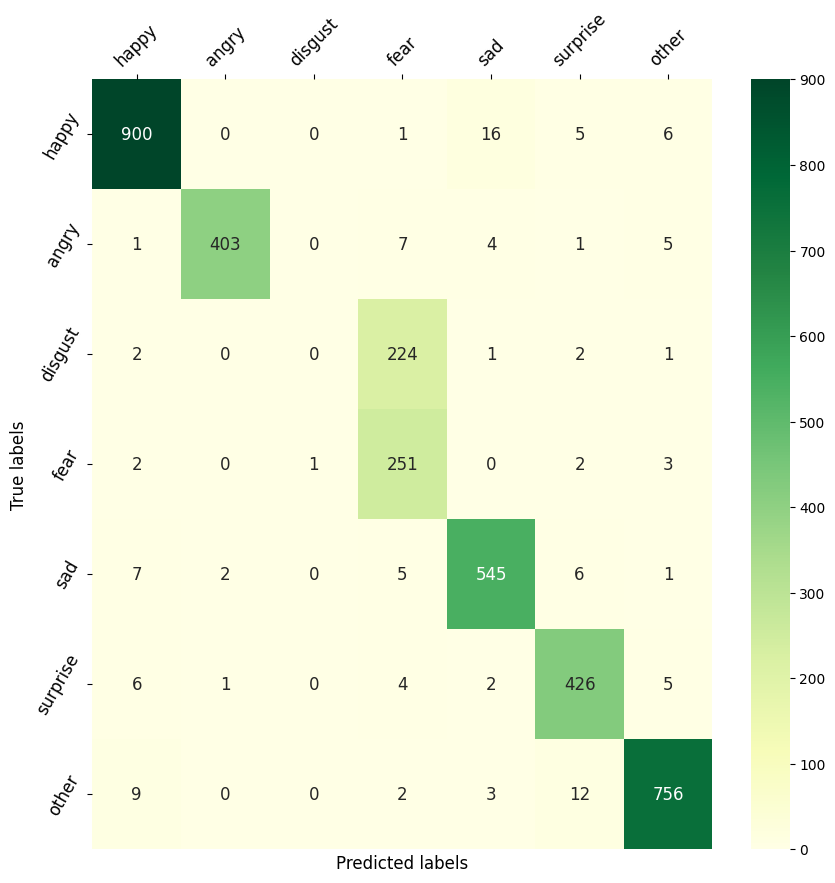

In [ ]:
con_mat(results['Actual'],results['Best Multimodal Model'])

In [ ]:
# pred_value = np.array(y_pred)
# y_pred = pd.DataFrame(pred_value, columns=['Label'])
# id = pd.DataFrame(testset['Id'])
# submit_df = pd.concat([id, y_pred], axis=1).set_index('Id')
# submit_df.to_csv('task1submit.csv')